    IMPORTING NEEDED LIBRARIES

In [3]:
%run EDA.py


In [18]:
import EDA 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score,mean_squared_error
from imblearn.over_sampling import SMOTE

In [5]:
#loading dataset using pandas
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(data.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [6]:
EDA.check_missing_values(data)

,Missing Num,index
age,0,
anaemia,0,
creatinine_phosphokinase,0,
diabetes,0,
ejection_fraction,0,
high_blood_pressure,0,
platelets,0,
serum_creatinine,0,
serum_sodium,0,
sex,0,


Since there is no missing value in the dataset, the data can be used now

In [7]:
#changing the data type of all values in the dataset to int
data = data.astype("int64")

In [8]:
EDA.descriptive_statistical_analysis(data)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
mean,[60.82943143812709],[0.431438127090301],[581.8394648829432],[0.4180602006688963],[38.08361204013378],[0.3511705685618729],[263358.02675585286],[0.979933110367893],[136.62541806020067],[0.6488294314381271],[0.3210702341137124],[130.2608695652174],[0.3210702341137124]
median,[60.0],[0.0],[250.0],[0.0],[38.0],[0.0],[262000.0],[1.0],[137.0],[1.0],[0.0],[115.0],[0.0]
mode,[60],[0],[582],[0],[35],[0],[263358],[1],[136],[1],[0],[187],[0]
var,[141.49094296424292],[0.2461224214944669],[941458.5714574311],[0.2441022648200937],[140.06345536576063],[0.2286143969832332],[9565668749.448944],[1.2076496599402873],[19.469955781015],[0.22861439698323285],[0.21871562927880447],[6023.96527575139],[0.21871562927880447]
std_dev,[11.894996551670072],[0.49610726813307915],[970.2878807124363],[0.49406706510360887],[11.834840741039173],[0.4781363790627452],[97804.23686859861],[1.0989311443126395],[4.412477283909233],[0.47813637906274487],[0.4676704280567721],[77.61420795029342],[0.4676704280567721]
min,[40],[0],[23],[0],[14],[0],[25100],[0],[113],[0],[0],[4],[0]
max,[95],[1],[7861],[1],[80],[1],[850000],[9],[148],[1],[1],[285],[1]
count,[299],[299],[299],[299],[299],[299],[299],[299],[299],[299],[299],[299],[299]
25%,[51.0],[0.0],[116.5],[0.0],[30.0],[0.0],[212500.0],[0.0],[134.0],[0.0],[0.0],[73.0],[0.0]
50%,[60.0],[0.0],[250.0],[0.0],[38.0],[0.0],[262000.0],[1.0],[137.0],[1.0],[0.0],[115.0],[0.0]


In [9]:
#Data preprocessing
#standardizing the dataset
data1 = (data.mean())/data.std()
data1

age                          5.113867
anaemia                      0.869647
creatinine_phosphokinase     0.599657
diabetes                     0.846161
ejection_fraction            3.217923
high_blood_pressure          0.734457
platelets                    2.692706
serum_creatinine             0.891715
serum_sodium                30.963427
sex                          1.356997
smoking                      0.686531
time                         1.678312
DEATH_EVENT                  0.686531
dtype: float64

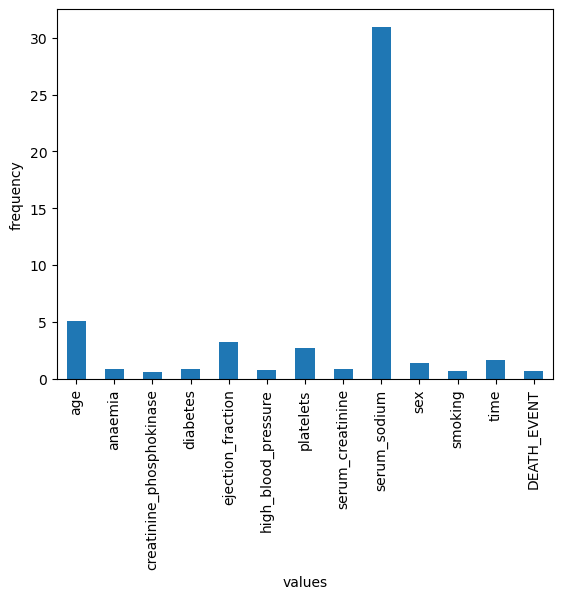

In [10]:
#this graph shows the frequency of each data column in the data set
EDA.graph(data1)

# CLASSIFICATION 1

In [11]:
x = data.drop("DEATH_EVENT", axis = 1)
y = data["DEATH_EVENT"]

In [12]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       299 non-null    int64
 1   anaemia                   299 non-null    int64
 2   creatinine_phosphokinase  299 non-null    int64
 3   diabetes                  299 non-null    int64
 4   ejection_fraction         299 non-null    int64
 5   high_blood_pressure       299 non-null    int64
 6   platelets                 299 non-null    int64
 7   serum_creatinine          299 non-null    int64
 8   serum_sodium              299 non-null    int64
 9   sex                       299 non-null    int64
 10  smoking                   299 non-null    int64
 11  time                      299 non-null    int64
 12  DEATH_EVENT               299 non-null    int64
dtypes: int64(13)
memory usage: 30.5 KB


In [17]:
models = {
    "Naive Bayes" : GaussianNB(),
    "Logistic Regression" :LogisticRegression(),
    "Support Vector Machine":SVC(),
    "Random Forest":RandomForestClassifier(),
    "KNearest Neighbor":KNeighborsClassifier(),
    "Multilayer Perception":MLPClassifier()}



results = {}
for name, model in models.items():
    np.random.seed(50)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    #con_matrix1 = confusion_matrix(y_test, y_pred)
    #acc_score1 = accuracy_score(y_test, y_pred)
    #prec_score1 = precision_score(y_test, y_pred, average = "weighted")
   # re_score1 = recall_score(y_test, y_pred, average = "weighted")
    #f1_score = f1_score(y_test, y_pred, average = "weighted")
    
    
    print(name,"confusion matrix", confusion_matrix(y_test, y_pred))
    print("accuracy",accuracy_score(y_test, y_pred))
    print("precision",precision_score(y_test, y_pred, average = "weighted"))
    print("recall", recall_score(y_test, y_pred, average = "weighted"))
    print("f1_score",f1_score(y_test, y_pred, average = "weighted"))
    print()
    
    conf_matrix1 =  confusion_matrix(y_test, y_pred)
    acc_score1 = accuracy_score(y_test, y_pred)
    prec_score1 = precision_score(y_test, y_pred, average = "weighted")
    re_score1 = recall_score(y_test, y_pred, average = "weighted")
    f1_score1 = f1_score(y_test, y_pred, average = "weighted")
    results[name] =[conf_matrix1,acc_score1, prec_score1,re_score1,f1_score1]
models1 = pd.DataFrame.from_dict(results)
models1["label"] = ["conf_matrix1","acc_score1","prec_score1","re_score1","f1_score1"]
print(models1)


Naive Bayes confusion matrix [[39  4]
 [ 7 10]]
accuracy 0.8166666666666667
precision 0.8099896480331262
recall 0.8166666666666667
f1_score 0.8108855865651806

Logistic Regression confusion matrix [[37  6]
 [ 6 11]]
accuracy 0.8
precision 0.8
recall 0.8
f1_score 0.8

Support Vector Machine confusion matrix [[43  0]
 [17  0]]
accuracy 0.7166666666666667
precision 0.5136111111111111
recall 0.7166666666666667
f1_score 0.5983818770226537



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sa

Random Forest confusion matrix [[34  9]
 [ 6 11]]
accuracy 0.75
precision 0.765
recall 0.75
f1_score 0.7556170628459784

KNearest Neighbor confusion matrix [[31 12]
 [15  2]]
accuracy 0.55
precision 0.5234472049689441
recall 0.55
f1_score 0.5358100761145344

Multilayer Perception confusion matrix [[ 0 43]
 [ 0 17]]
accuracy 0.2833333333333333
precision 0.08027777777777777
recall 0.2833333333333333
f1_score 0.1251082251082251

          Naive Bayes Logistic Regression Support Vector Machine  \
0  [[39, 4], [7, 10]]  [[37, 6], [6, 11]]     [[43, 0], [17, 0]]   
1            0.816667                 0.8               0.716667   
2             0.80999                 0.8               0.513611   
3            0.816667                 0.8               0.716667   
4            0.810886                 0.8               0.598382   

        Random Forest    KNearest Neighbor Multilayer Perception         label  
0  [[34, 9], [6, 11]]  [[31, 12], [15, 2]]    [[0, 43], [0, 17]]  conf_matrix1  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

According to the table of model performances above, the Random Forest model is the best recommendation for this dataset.

# classification II

<AxesSubplot:xlabel='index', ylabel='DEATH_EVENT'>

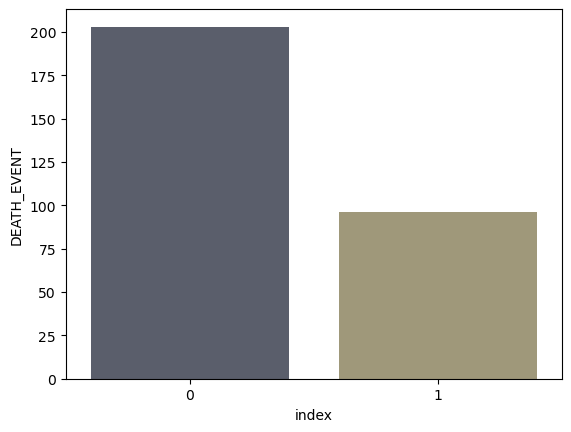

In [16]:
#create a table to check for inbalance in the target column
target_column = data["DEATH_EVENT"]
balance_check = data["DEATH_EVENT"].value_counts().reset_index()
sns.barplot(x="index", y="DEATH_EVENT", data = balance_check, palette = "cividis")

From the graph above, DEATH_EVENT = 0 is greater than that of DEATH_EVENT = 1. This implies that our dataset is imbalanced. To balance the dataset we can either over sample or undersample. For the above dataset, undersampling would have been the best choice to reduce DEATH_EVENT = 0 to the same ratio as DEATH_EVENT = 1 but this would result in loosing 100 rows of DEATH_EVENT = 0 . so the SMOTE would be used to balance our dataset.

In [ ]:
#balancing the dataset using smote
smote = SMOTE()
x_smoted,y_smoted = smote.fit_resample(x,y)
#creating a new data table from the balanced data
data_bal = pd.concat([x_smoted,y_smoted], axis=1 )
print(data)


In [ ]:
#splitting the balanced dataset
x = data_bal.drop("DEATH_EVENT", axis = 1)
y = data_bal["DEATH_EVENT"]

In [ ]:
#splitting into train and test
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


In [ ]:
#creating models from the balanced dataset and looping each model over the dataset
models = {
    "Naive Bayes" : GaussianNB(),
    "Logistic Regression" :LogisticRegression(),
    "Support Vector Machine":SVC(),
    "Random Forest":RandomForestClassifier(),
    "KNearest Neighbor":KNeighborsClassifier(),
    "Multilayer Perception":MLPClassifier()}



results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
   
    
    print(name,"confusion matrix", confusion_matrix(y_test, y_pred))
    print("accuracy",accuracy_score(y_test, y_pred))
    print("precision",precision_score(y_test, y_pred, average = "weighted"))
    print("recall", recall_score(y_test, y_pred, average = "weighted"))
    print("f1_score",f1_score(y_test, y_pred, average = "weighted"))
    print()
    
    conf_matrix2 =  confusion_matrix(y_test, y_pred)
    acc_score2 = accuracy_score(y_test, y_pred)
    prec_score2 = precision_score(y_test, y_pred, average = "weighted")
    re_score2 = recall_score(y_test, y_pred, average = "weighted")
    f1_score2 = f1_score(y_test, y_pred, average = "weighted")
    results[name] =[conf_matrix2,acc_score2, prec_score2,re_score2,f1_score2]
models2 = pd.DataFrame.from_dict(results)
models2["label"] = ["conf_matrix2","acc_score2","prec_score2","re_score2","f1_score2"]
print(models2)


In [ ]:
#comparing the results of naives bayes model
index = ["conf_matrix","acc_score","prec_score","re_score","f1_score"]
Naive_compare = pd.DataFrame(np.array(models1["Naive Bayes"]),np.array(models2["Naive Bayes"])).reset_index()
Naive_compare.insert(loc = 0, value = index, column = "perf")

Naive_compare.columns =["perf","bal","imbal"]
Naive_compare
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification

In [ ]:
#comparing the results of Logistic regression model
index = ["conf_matrix","acc_score","prec_score","re_score","f1_score"]
Logistics_compare = pd.DataFrame(np.array(models1["Logistic Regression"]),np.array(models2["Logistic Regression"])).reset_index()
Logistics_compare.insert(loc = 0, value = index, column = "perf")

Logistics_compare.columns =["perf","bal","imbal"]
Logistics_compare
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification

In [ ]:
#comparing the results of SVM model
index = ["conf_matrix","acc_score","prec_score","re_score","f1_score"]
SVM_compare = pd.DataFrame(np.array(models1["Support Vector Machine"]),np.array(models2["Support Vector Machine"])).reset_index()
SVM_compare.insert(loc = 0, value = index, column = "perf")

SVM_compare.columns =["perf","bal","imbal"]
SVM_compare
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification

According to the table above, the model performance of the balanced dataset is higher than that which was imbalanced. This implies that SVM is data biassed.

In [ ]:
#comparing the results of  Random Forest model
index = ["conf_matrix","acc_score","prec_score","re_score","f1_score"]
Randfor_compare = pd.DataFrame(np.array(models1["Random Forest"]),np.array(models2["Random Forest"])).reset_index()
Randfor_compare.insert(loc = 0, value = index, column = "perf")

Randfor_compare.columns =["perf","bal","imbal"]
Randfor_compare
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification

In [ ]:
#comparing the results of KNN model
index = ["conf_matrix","acc_score","prec_score","re_score","f1_score"]
KNN_compare = pd.DataFrame(np.array(models1["KNearest Neighbor"]),np.array(models2["KNearest Neighbor"])).reset_index()
KNN_compare.insert(loc = 0, value = index, column = "perf")

KNN_compare.columns =["perf","bal","imbal"]
KNN_compare
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification

In [ ]:
#comparing the results of Multilayer Perception model
index = ["conf_matrix","acc_score","prec_score","re_score","f1_score"]
Multilayer_compare = pd.DataFrame(np.array(models1["Multilayer Perception"]),np.array(models2["Multilayer Perception"])).reset_index()
Multilayer_compare.insert(loc = 0, value = index, column = "perf")

Multilayer_compare.columns =["perf","bal","imbal"]
Multilayer_compare
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification

# Feature Selection

In [ ]:
from scipy.stats import mannwhitneyu, chi2_contingency
#splitting data into survived and dead
dead = data_bal[data_bal["DEATH_EVENT"]==0]
survived= data_bal[data_bal["DEATH_EVENT"]==1]

#creating an empty list to store the values of the reults
feature_name =[]
mann_values = []
chi_values = []
 #looping over the data features
for feature in data_bal.columns:
    feature_name.append(feature)
    if feature != "DEATH_EVENT":
        stat, p = mannwhitneyu(dead[feature],survived[feature])
        mann_values.append([feature, p ])
        c,p,dof,exp = chi2_contingency(pd.crosstab(data_bal[feature],data["DEATH_EVENT"]))
        chi_values.append([feature,p])
    
da1 = pd.DataFrame(chi_values)
da1.columns =["Features","Chi_values"]
da2 = pd.DataFrame(mann_values)
da2.columns =["Features","Mann_values"]
significance = pd.concat([da1,da2["Mann_values"]], axis = 1)

significance


    

In [ ]:
#filtering significance by the p-values
sign_filter = significance[(significance.Chi_values<0.05) & (significance.Mann_values<0.05)]
sign_filter

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

In [ ]:
#Drawing the graph for feature importance
plt.figure(figsize = (10,8))
(pd.Series(clf.feature_importances_,index = x.columns ).nlargest(4).plot(kind="barh"))
plt.title("Feature Importance")
plt.show()

# CLASSIFICATION III

In [ ]:
x = data_bal[["ejection_fraction","serum_creatinine" ,"serum_sodium","time"]]
y = data_bal["DEATH_EVENT"]

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [ ]:
#creating models from the selected feature dataset and looping each model over the dataset
models = {
    "Naive Bayes" : GaussianNB(),
    "Logistic Regression" :LogisticRegression(),
    "Support Vector Machine":SVC(),
    "Random Forest":RandomForestClassifier(),
    "KNearest Neighbor":KNeighborsClassifier(),
    "Multilayer Perception":MLPClassifier()}



results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
   
    
    print(name,"confusion matrix", confusion_matrix(y_test, y_pred))
    print("accuracy",accuracy_score(y_test, y_pred))
    print("precision",precision_score(y_test, y_pred, average = "weighted"))
    print("recall", recall_score(y_test, y_pred, average = "weighted"))
    print("f1_score",f1_score(y_test, y_pred, average = "weighted"))
    print()
    
    conf_matrix3 =  confusion_matrix(y_test, y_pred)
    acc_score3 = accuracy_score(y_test, y_pred)
    prec_score3 = precision_score(y_test, y_pred, average = "weighted")
    re_score3 = recall_score(y_test, y_pred, average = "weighted")
    f1_score3 = f1_score(y_test, y_pred, average = "weighted")
    results[name] =[conf_matrix3,acc_score3, prec_score3,re_score3,f1_score3]
models3 = pd.DataFrame.from_dict(results)
models3["label"] = ["conf_matrix3","acc_score3","prec_score3","re_score3","f1_score3"]
print(models3)


In [ ]:

sel_feat = pd.Series(np.array(models3["Naive Bayes"]))
Naive_compare1 = pd.concat([Naive_compare,sel_feat],axis=1)

Naive_compare1.columns =["perf","bal","imbal","Sel_feature"]
Naive_compare1
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification,sel_feature for feature selection

In [ ]:
#comparing the results of Logistic regression model
sel_featl = pd.Series(np.array(models3["Logistic Regression"]))
Logistics_compare1 = pd.concat([Logistics_compare,sel_featl],axis=1)

Logistics_compare1.columns =["perf","bal","imbal","sel_features"]
Logistics_compare1
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification,sel_feature for feature selection

In [ ]:
#comparing the results of SVM model
sel_feats =  pd.Series(np.array(models3["Support Vector Machine"]))
SVM_compare1 = pd.concat([SVM_compare,sel_feats],axis =1)

SVM_compare1.columns =["perf","bal","imbal","Sel_features"]
SVM_compare1
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification
#and sel_features for model performance of the feature importance"""

In [ ]:
#comparing the results of  Random Forest model
sel_featr =  pd.Series(np.array(models3["Random Forest"]))
Randfor_compare1 = pd.concat([Randfor_compare,sel_featr],axis=1)
Randfor_compare1.columns =["perf","imbal","bal","sel_feature"]
Randfor_compare1
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification
#and sel_features for model performance of the feature importance

In [ ]:
#comparing the results of KNN model
sel_featk =  pd.Series(np.array(models3["KNearest Neighbor"]))
KNN_compare1 = pd.concat([KNN_compare,sel_featk],axis =1)

KNN_compare1.columns =["perf","bal","imbal","sel_feature"]
KNN_compare1
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification
#and sel_features for model performance of the feature importance classification

In [ ]:
#comparing the results of Multilayer Perception model
sel_fetm = pd.Series(np.array(models3["Multilayer Perception"]))
Multilayer_compare1 = pd.concat([Multilayer_compare,sel_fetm],axis=1)
Multilayer_compare1.columns =["perf","bal","imbal","sel_feature"]
Multilayer_compare1
#imbal represent the model performs of the first classification while bal represent the value of the balaced classification
#and sel_features for model performance of the feature importance